In [ ]:
 ! jupyter nbconvert --to html ///content/yolov8_footbal_player_detection.ipynb

[NbConvertApp] Converting notebook ///content/yolov8_footbal_player_detection.ipynb to html
[NbConvertApp] Writing 2954271 bytes to /content/yolov8_footbal_player_detection.html


downlaod data from: https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/dataset/2?ref=blog.roboflow.com

In [ ]:
!nvidia-smi

Sat Jan  6 15:27:47 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Setup

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.235 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.6/78.2 GB disk)


In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 402, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are ('train', 'val', 'predict', 'export', 'track', 'benchmark').

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose', 'obb')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht

#data

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="8f60PiLN5qzO0Jq6glkd")
project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
dataset = project.version(2).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.235, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to football-players-detection-2 in yolov8:: 100%|██████████| 1338/1338 [00:00<00:00, 2194.19it/s]


In [ ]:

!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=100 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 211MB/s]
Ultralytics YOLOv8.0.235 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/football-players-detection-2/data.yaml, epochs=100, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=F

In [ ]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=900)

NameError: name 'Image' is not defined

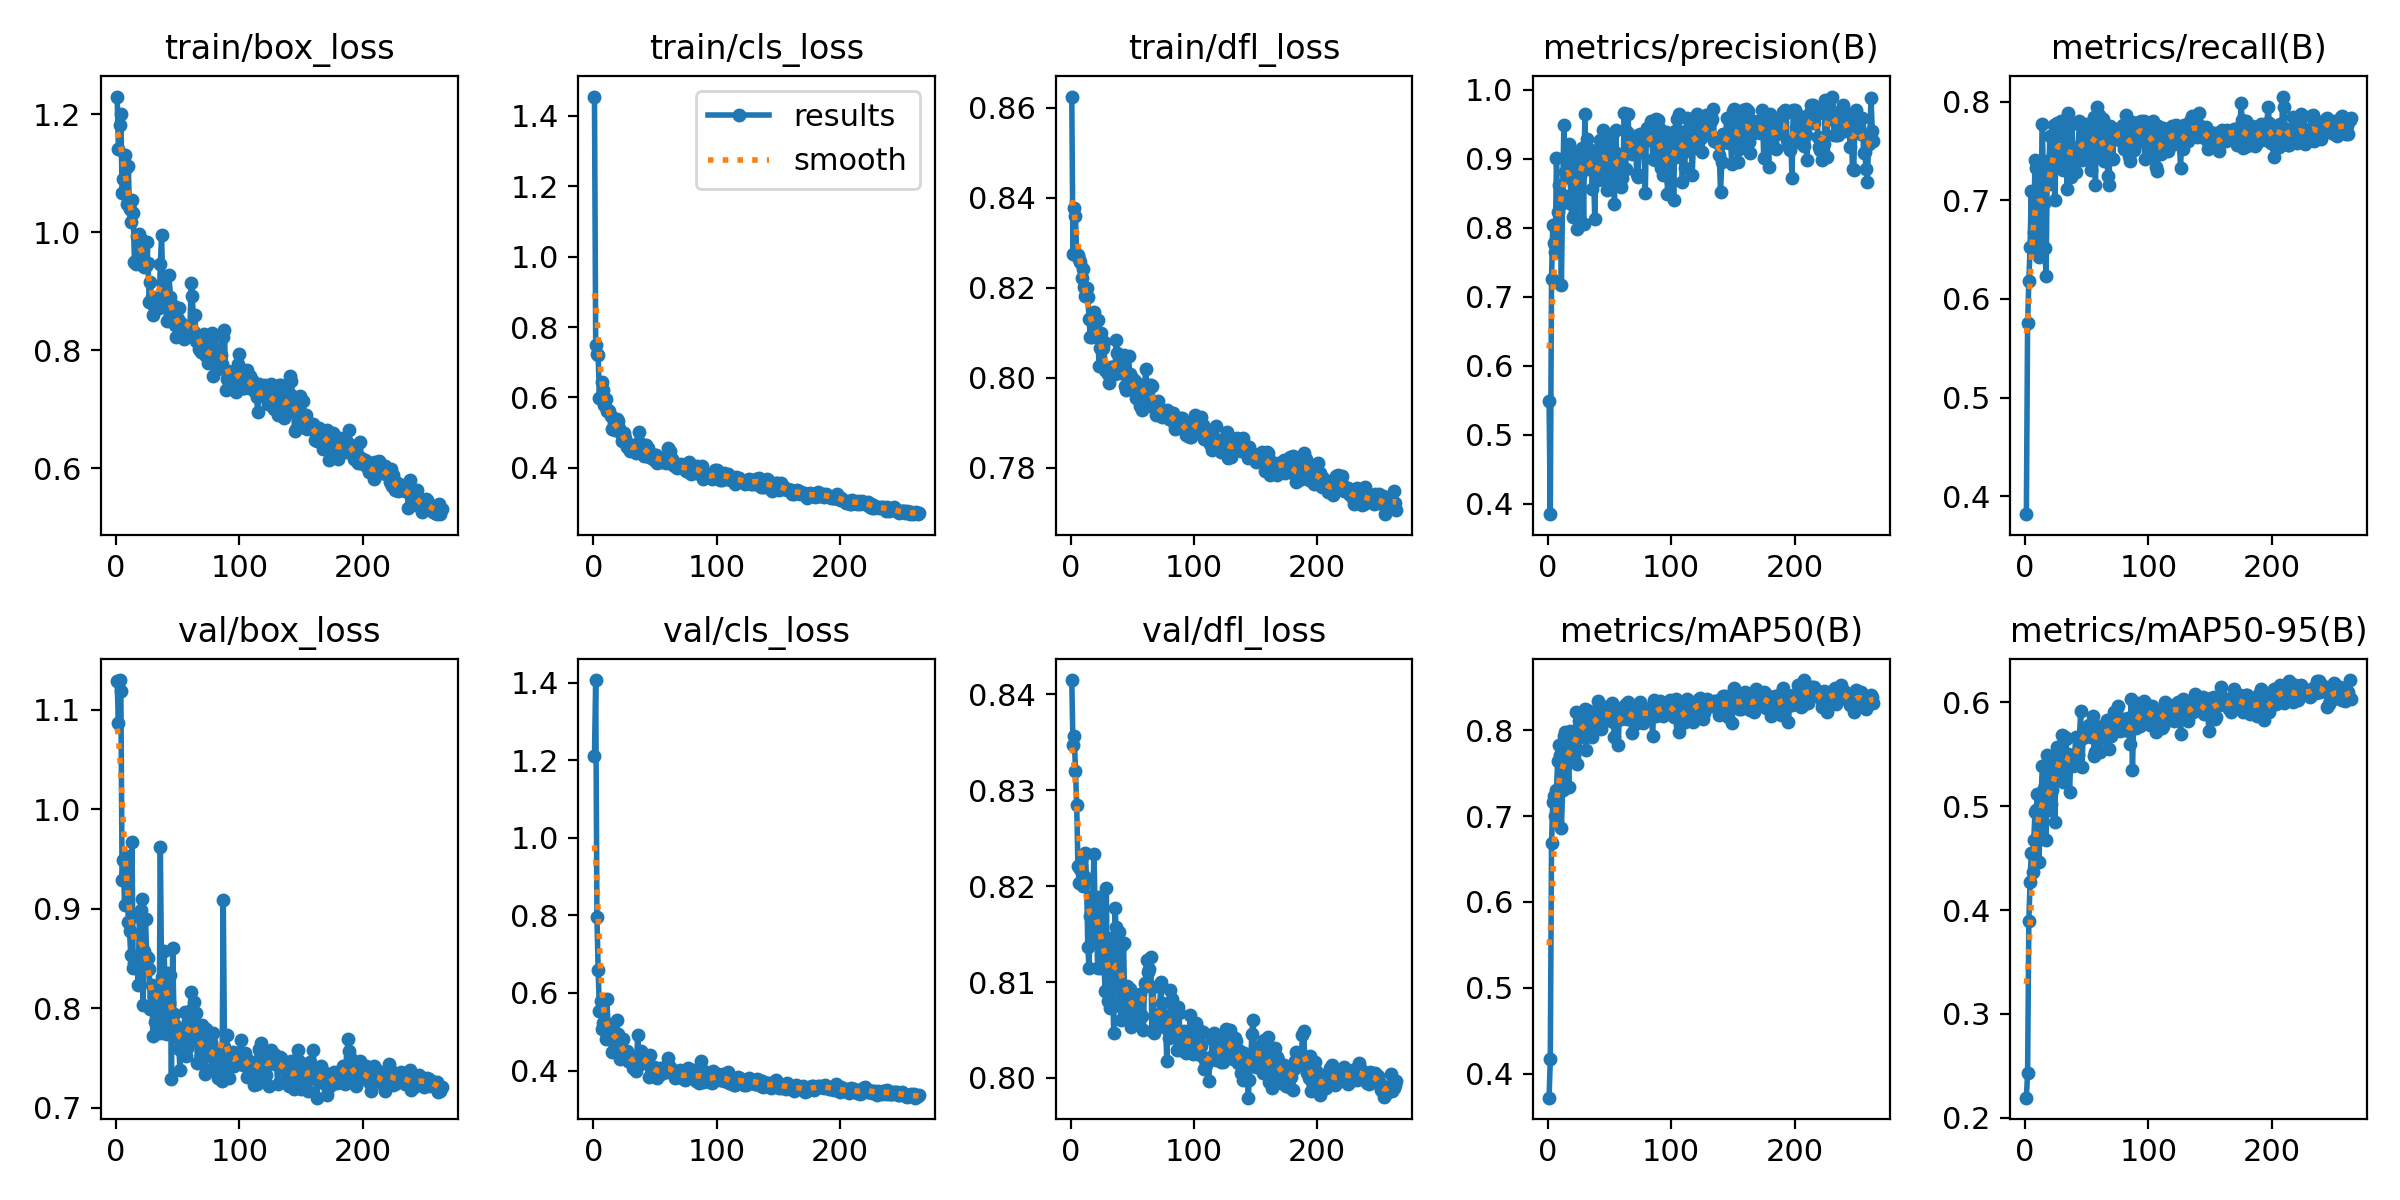

In [ ]:
Image(filename=f'/content/runs/detect/train/results.png', width=800)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.234 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/football-players-detection-2/valid/labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100% 38/38 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0% 0/3 [00:00<?, ?it/s]WARNING ⚠️ NMS time limit 1.300s exceeded
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:06<00:00,  2.26s/it]
                   all         38        905      0.936      0.508      0.663      0.492
                  ball         38         35      0.911      0.294      0.442      0.212
            goalkeeper         38         27      0.879      0.556      0.676      0.531
                player         38        754      0.979      0.585      0.771      0.651
               referee         38         89      0.974

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images

Ultralytics YOLOv8.0.234 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/13 /content/football-players-detection-2/test/images/40cd38_7_6_png.rf.dc7957fcce915bc48188f18a7b19455b.jpg: 640x640 21 players, 2 referees, 37.1ms
image 2/13 /content/football-players-detection-2/test/images/42ba34_1_5_png.rf.927d602c034ce2997f58f62a7c1245ba.jpg: 640x640 1 ball, 1 goalkeeper, 22 players, 2 referees, 37.1ms
image 3/13 /content/football-players-detection-2/test/images/42ba34_5_5_png.rf.f691b18c36a92663c7241c99d4202bcc.jpg: 640x640 1 goalkeeper, 19 players, 1 referee, 37.1ms
image 4/13 /content/football-players-detection-2/test/images/4b770a_1_4_png.rf.8a0f6be9776a652d40938181f60b3a6c.jpg: 640x640 1 goalkeeper, 19 players, 2 referees, 37.0ms
image 5/13 /content/football-players-detection-2/test/images/4b770a_3_6_png.rf.f5d975605c1f73e1a95a1d8edc4ce5b1.jpg

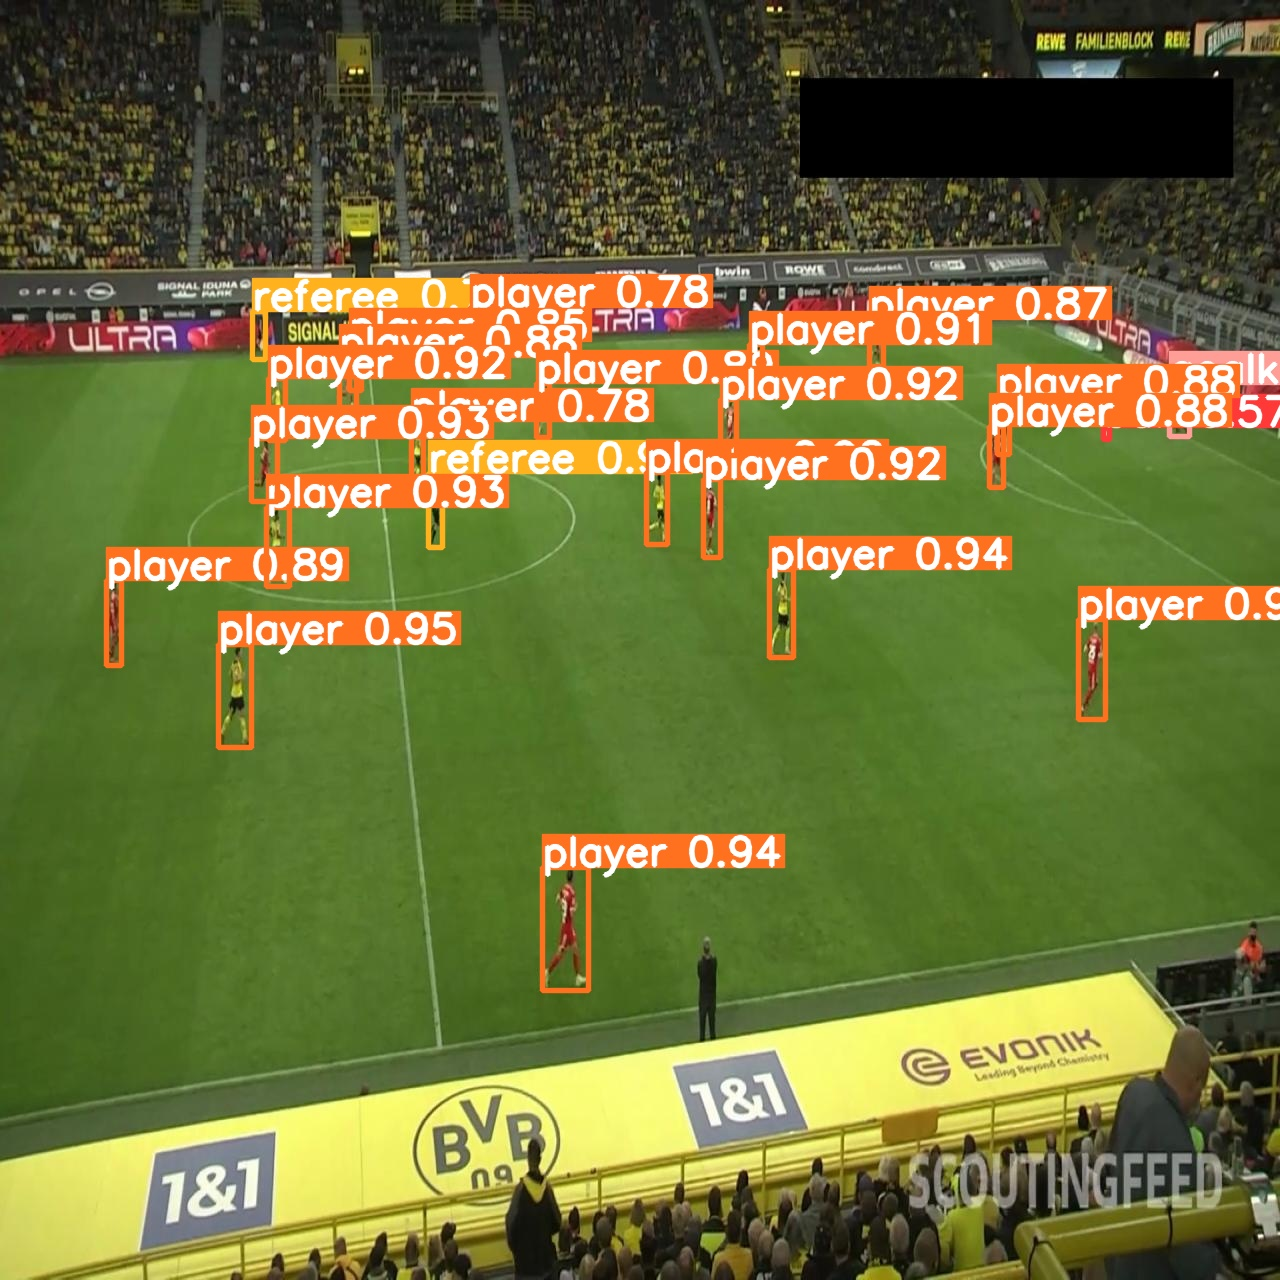

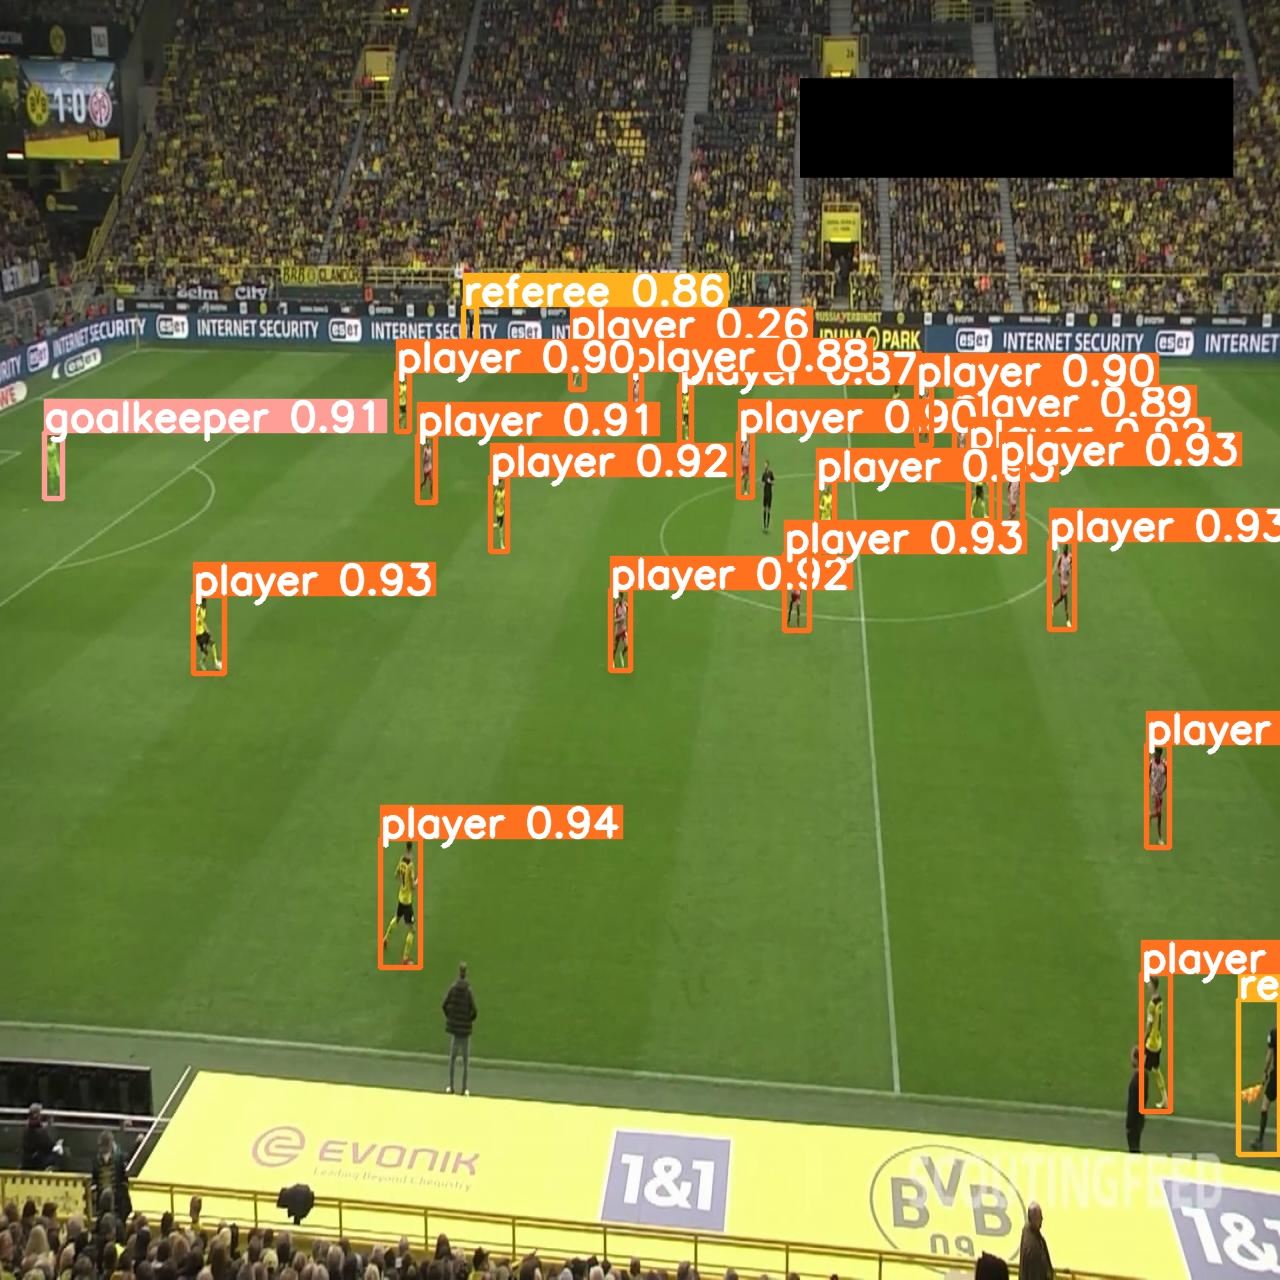

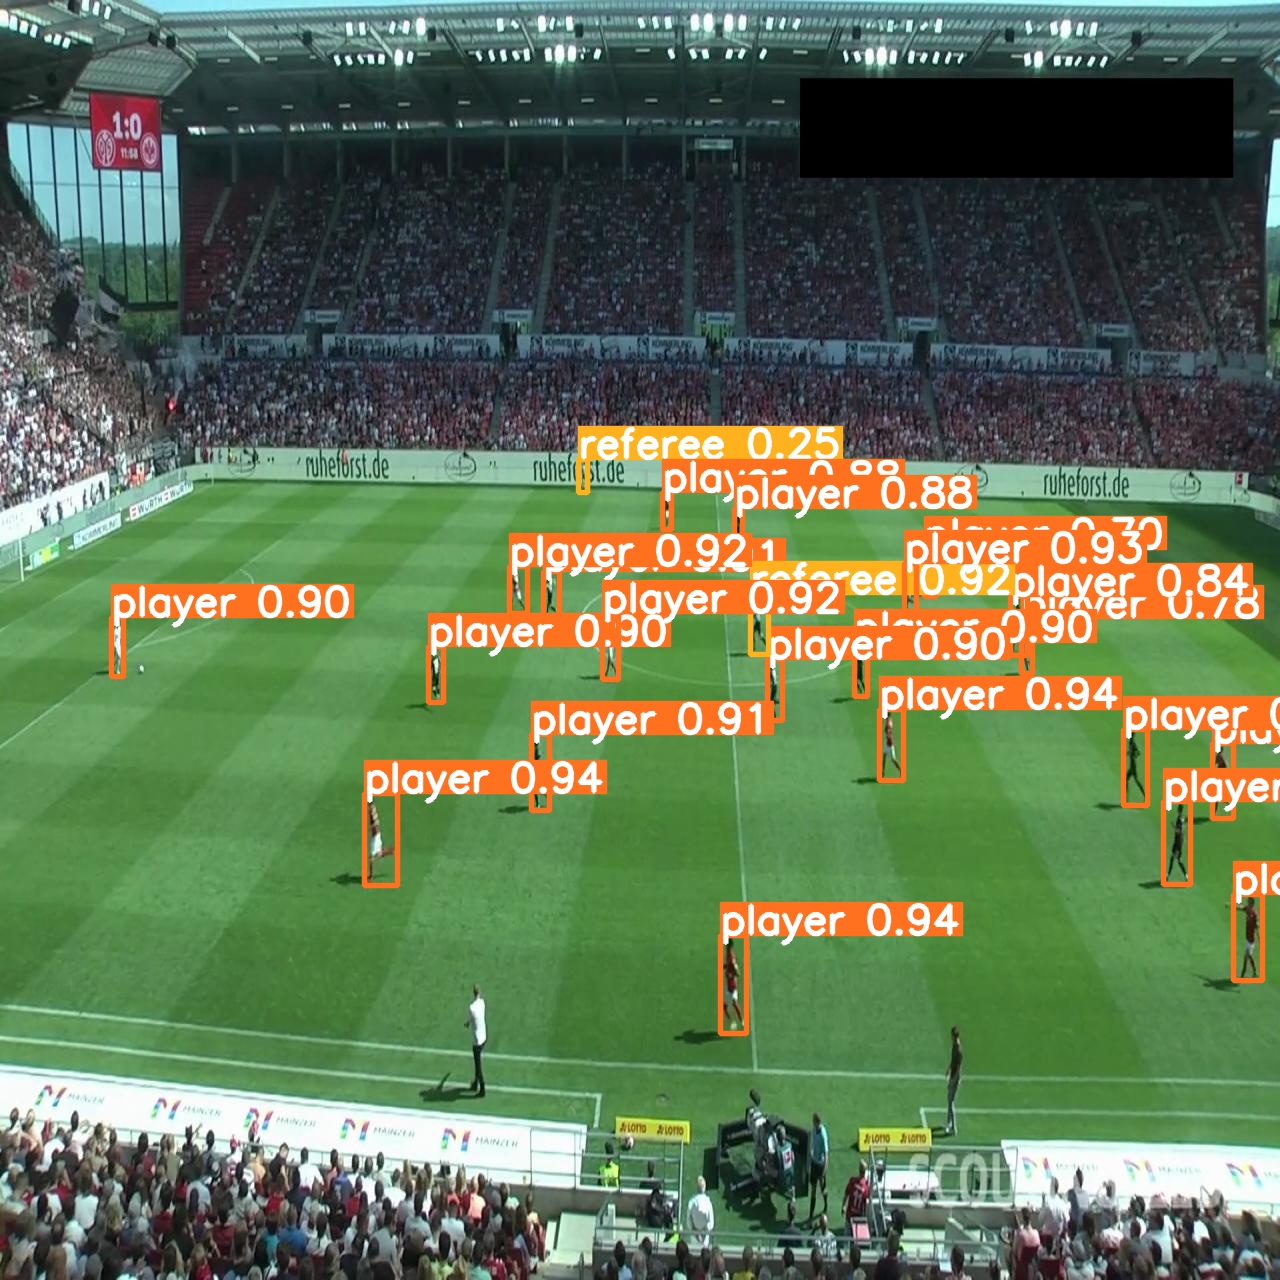

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:3]:
  display(Image(filename=image_path,height=600))
  print("\n")